# Detection on one trace

Here, we want to test the detection method in one trace. This method was created for the SismoAvalanche project. Check this project to have more informations about this method : https://github.com/thibaut-ceci/SismoAvalanche

In [6]:
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import analysis
import catalog
import figures

tqdm.pandas()
catalog.display_parameters()
np.set_printoptions(threshold=np.inf)

<Token var=<ContextVar name='format_options' default={'edgeitems': 3, 'threshold': 1000, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': 9223372036854775807, 'override_repr': None} at 0x0000020CEED4A980> at 0x0000020CB183B0C0>

## Load the database

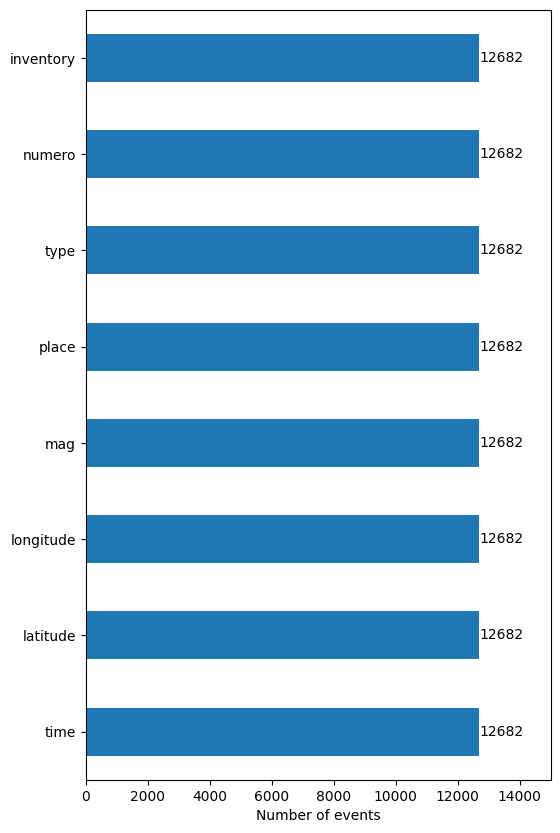

In [7]:
dataframe = catalog.load("data/new_dataframe_with_inventory_cleaned.pickle")

catalog.open_plot(dataframe, pos_number=0.04, xlim=15000)

## Choose one event

In [8]:
event_index = 5

## The detection method

In [9]:
## Filtering seismic data
_, trace = analysis.filter_stream(event_index, freq_HP=9, freq_LP=0.5, max_percentage=0.3)

## The detection method
time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold = analysis.detection_on_one_trace(trace, dataframe, event_index)

Detection on event 5


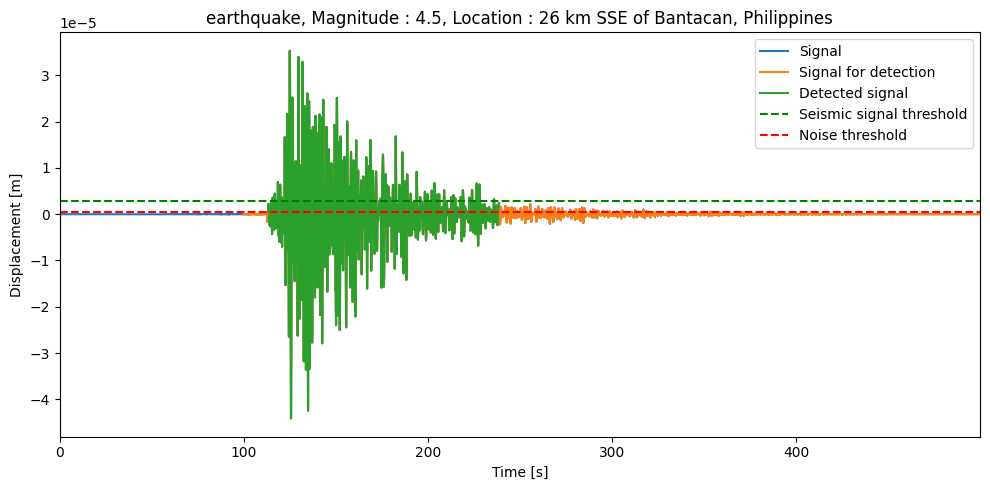

In [10]:
## Plot the raw signal after filtering, the signal for detection based on the start and end time from the database, the detected signal and the thresholds
figures.plot_detected_signal(time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold)

## Add the title with the type, the magnitude and the place of the event
plt.title(f"{dataframe['type'][event_index]}, Magnitude : {dataframe['mag'][event_index]}, Location : {dataframe['place'][event_index]}")

## Save the figure
figures.save(f"figures/detected_method/detected_method_on_event_{event_index}")
plt.show()